In [1]:
import numpy as np
import pandas as pd
import warnings

### Get Te Dataset

In [2]:
warnings.filterwarnings('ignore')

In [7]:
columns_name=["user_id","item_id","rating","timestamp"]     #assign column name
df=pd.read_csv('ml-100k/u.data',sep='\t',names=columns_name)    #reading csv file

In [8]:
df.tail()  #show top 5 of df

,user_id,item_id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [9]:
df.shape

(100000, 4)

In [10]:
df["user_id"].nunique()

943

In [11]:
df["item_id"].nunique()   #how many unique item id

1682

In [12]:
movies_title=pd.read_csv("ml-100k/u.item", sep="\|",encoding = "ISO-8859-1", header=None)
movies_title.shape
print(movies_title)

        0                                          1            2   3   \
0        1                           Toy Story (1995)  01-Jan-1995 NaN   
1        2                           GoldenEye (1995)  01-Jan-1995 NaN   
2        3                          Four Rooms (1995)  01-Jan-1995 NaN   
3        4                          Get Shorty (1995)  01-Jan-1995 NaN   
4        5                             Copycat (1995)  01-Jan-1995 NaN   
...    ...                                        ...          ...  ..   
1677  1678                          Mat' i syn (1997)  06-Feb-1998 NaN   
1678  1679                           B. Monkey (1998)  06-Feb-1998 NaN   
1679  1680                       Sliding Doors (1998)  01-Jan-1998 NaN   
1680  1681                        You So Crazy (1994)  01-Jan-1994 NaN   
1681  1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996 NaN   

                                                     4   5   6   7   8   9   \
0     http://us.imdb.com/M/title

In [13]:
movies_title=movies_title[[0,1]]   #selecting only 0 and 1 coloumn and assign it to movies_title
movies_title.columns=["item_id","title"]   #works same as previously we used name

In [14]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
#merging two DataFrame
df=pd.merge(df,movies_title,on="item_id")   #both has item id show mergeing respect to id 
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [16]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [19]:
df.groupby("title").mean()["rating"].sort_values(ascending=False).head()   #sorting respect to value of rating 

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [20]:
df.groupby("title").count()["rating"].sort_values(ascending=False)     #sorting respect to number of rating 

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [21]:
ratings=pd.DataFrame(df.groupby("title").mean()["rating"])   #assign it to ratings
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [22]:
ratings["No of ratings"]=pd.DataFrame(df.groupby("title").count()["rating"])  #creting a new coloumn of number of ratings
ratings

,rating,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [23]:
ratings.sort_values(by="rating",ascending=False)

,rating,No of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


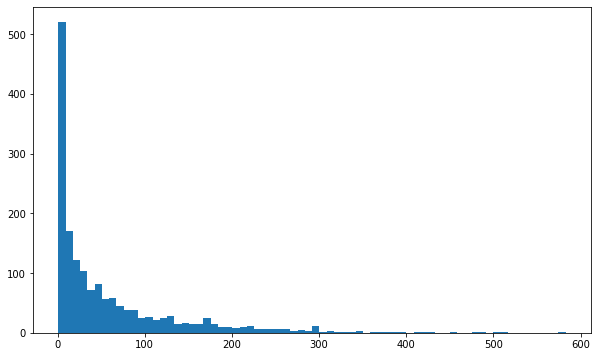

In [24]:
plt.figure(figsize=(10,6))
plt.hist(ratings["No of ratings"],bins=70)  #x axis=how many user rated, y axis=how many time that appear
plt.show()

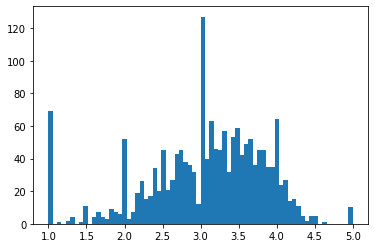

In [25]:
plt.hist(ratings["rating"],bins=70)
plt.show()

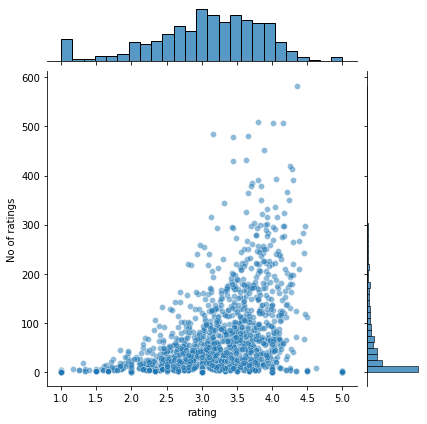

In [26]:
sns.jointplot(x="rating",y="No of ratings",data=ratings,alpha=0.5)

## Creating MOVIE RECOMMENDATION

In [27]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [28]:
movie_mat=df.pivot_table(index="user_id",columns="title",values="rating")
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings.sort_values("No of ratings",ascending=False)

,rating,No of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [30]:
star_wars_user_rating=movie_mat["Star Wars (1977)"]  #check which user have given review to the movie
star_wars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [31]:
similler_to_starwars=movie_mat.corrwith(star_wars_user_rating)   #fining similer with the movies to other movies

In [32]:
similler_to_starwars    #this is a series not dataset

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [33]:
corr_starwars=pd.DataFrame(similler_to_starwars,columns=["correlation"])   #converting into dataframe

In [34]:
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [35]:
corr_starwars.dropna(inplace=True)   #inplace chane in original data frame(remove permanently)

In [36]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [37]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [38]:
corr_starwars=corr_starwars.join(ratings['No of ratings'])    #joining another dataset name no of rating
corr_starwars.head()

,correlation,No of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [39]:
corr_starwars[corr_starwars['No of ratings']>100].sort_values('correlation',ascending=False)

,correlation,No of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Function

In [40]:
def predict_movies(movies_name):
    movie_user_rating=movie_mat[movies_name]
    similler_to_movie=movie_mat.corrwith(movie_user_rating)

    corr_movie=pd.DataFrame(similler_to_movie,columns=["correlation"])
    corr_movie.dropna(inplace=True)

    corr_movie=corr_movie.join(ratings['No of ratings'])
    prediction=corr_movie[corr_movie['No of ratings']>100].sort_values('correlation',ascending=False)
    
    return prediction

In [42]:
predictions=predict_movies("Richard III (1995)")
predictions

,correlation,No of ratings
title,,
"Devil's Advocate, The (1997)",0.660363,188
True Romance (1993),0.601852,104
Down Periscope (1996),0.576471,101
Wag the Dog (1997),0.567291,137
Kingpin (1996),0.556443,162
...,...,...
Pretty Woman (1990),-0.402823,164
Home Alone (1990),-0.425145,137
One Fine Day (1996),-0.442326,112
